In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import time
import seaborn as sns

In [223]:
df = pd.read_json('Vadered_Data')
df = df.loc[:,'created_utc':]
# df.Ass = df.Ass.map(eval)
# df.Ass2 = df.Ass2.map(eval)
df['Ass%'] = [i[1] if i[0] == 'YTA' else 1-i[1] for i in df.Ass]

In [224]:
df.created_utc = df.created_utc/1000
df.retrieved_on = df.retrieved_on/1000
df.updated_utc = df.updated_utc/1000

In [225]:
df.created_utc = pd.to_datetime(df.created_utc.map(time.ctime))
df.retrieved_on = pd.to_datetime(df.retrieved_on.map(time.ctime))
df.updated_utc = pd.to_datetime(df.updated_utc.map(time.ctime))

In [231]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import BaggingRegressor

from tqdm import tqdm_notebook

In [228]:
df.columns

Index(['created_utc', 'gildings', 'is_crosspostable', 'is_robot_indexable',
       'no_follow', 'num_comments', 'over_18', 'retrieved_on', 'score',
       'selftext', 'send_replies', 'updated_utc', 'wls', 'Ass', 'Ass2', 'y',
       'vader_compound', 'vader_neg', 'vader_neu', 'vader_pos', 'quote_len',
       'family?', 'hour_0', 'hour_1', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_2', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'Ass%'],
      dtype='object')

In [229]:
lr = LinearRegression()
scaler = StandardScaler()

X = df[['gildings', 'is_crosspostable', 'is_robot_indexable','no_follow',
        'num_comments', 'over_18', 'score','send_replies','wls',
       'vader_compound', 'vader_neg', 'vader_neu', 'vader_pos', 'quote_len',
       'family?', 'hour_0', 'hour_1', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_2', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9']].astype(float)
y = df['Ass%']

Xs = scaler.fit_transform(X)

lr.fit(Xs, y)

scores = cross_val_score(lr, Xs, y, cv=5)


yhat = lr.predict(Xs)

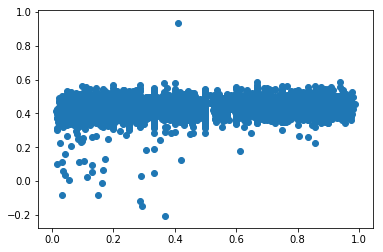

In [219]:
plt.scatter(y,yhat)

In [ ]:
sns.pairplot(X)

In [233]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [235]:
knn = KNeighborsRegressor(n_neighbors=20)
dtc = DecisionTreeRegressor()

In [236]:
params = {'base_estimator':[knn,dtc],
          'n_estimators':[100,200,300,400,500],
          'max_samples':[100], 'max_features':[1,2,3,4,5,6,7,8,9,10],
          'bootstrap':[True], 'bootstrap_features':[True]}

In [238]:
br = BaggingRegressor()

In [239]:
gcv = GridSearchCV(br,params,cv=5,verbose = 1,n_jobs=-1)

In [241]:
gcv.fit(Xs,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'base_estimator': [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=Non... 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True], 'bootstrap_features': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [242]:
gcv.best_score_

0.05937818368218039

In [244]:
yhat = gcv.predict(Xs)

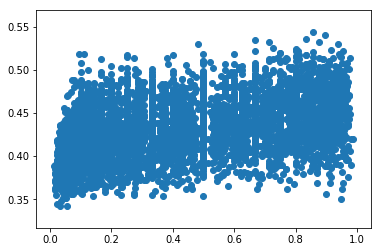

In [248]:
plt.scatter(y,yhat)
# plt.plot([0,1],[0,1],'r')

[Next Section](./Sub7_TFID_Vectoriser.ipynb)